# Dataset Performance de Estudantes

* Link para o dataset: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data



# **Importando bibliotecas**

In [ ]:
#bilbiotecas para realizar operações sobre os dados
import pandas as pd
import numpy as np

#bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

#Importanto técnicas de avaliação de modelos
from sklearn.metrics import accuracy_score  #métrica acurácia
from sklearn.metrics import recall_score #métrica precisão
from sklearn.metrics import confusion_matrix  #matriz de confusão
from sklearn.metrics import classification_report #várias métricas
from sklearn.model_selection import train_test_split #técnica de partição em treino e teste

#Importando as técnicas de aprendizagem
from sklearn.tree import DecisionTreeClassifier #árvore de decisão

#Retorno if-then da árvore
from sklearn.tree import export_text
from sklearn.tree import plot_tree #representação gráfica da árvore de decisão

# **Importando dados**

In [ ]:
performance_estudantes = pd.read_csv("archive(1).csv")
performance_estudantes.head(100)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1096,16,1,2,3,19.278320,29,0,3,0,0,0,1,0.732908,4.0
96,1097,16,1,1,1,12.831594,29,0,4,0,0,1,0,0.965482,4.0
97,1098,18,0,0,2,0.468659,5,0,2,0,1,0,0,2.555233,2.0
98,1099,16,0,0,3,8.603518,25,0,2,1,0,1,1,0.744322,4.0


**Descrição das Variáveis**

*   StudentID  (Numérica) - Identificador do estudante
*   Age (Numérica) - Idade
*   Gender (Categórica) - Gênero Masculino/Feminino
*   Ethnicity (Categórica) - Etnia do estudante
*   ParentalEducation (Categórica) - Escolaridade dos pais
*   StudyTimeWeekly  (Numérica) - Horas de estudo semanais
*   Absences (Numérica) - Faltas
*   Tutoring (Categórica) - O aluno recebe aulas de reforço (Sim/Não)
*   ParentalSupport (Categórica) - Nível de apoio dos pais
*   Extracurricular (Categórica) - Atividades extracurriculares (Sim/Não)
*   Sports (Categórica) - Participação em esportes (Sim/Não)
*   Music (Categórica) - Participação em atividades musicais (Sim/Não)
*   Volunteering (Categórica)- Participação em voluntariado (Sim/Não)
*   GPA (Numérica)- Média de notas do aluno
*   GradeClass (Categórica) - Classifica o GPA dos estudantes no formato:
0. 'A' (GPA >= 3.5)
1. 'B' (3.0 <= GPA < 3.5)
2. 'C' (2.5 <= GPA < 3.0)
3. 'D' (2.0 <= GPA < 2.5)
4. 'F' (GPA < 2.0)






















# **Análise Descritiva**

In [ ]:
performance_estudantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


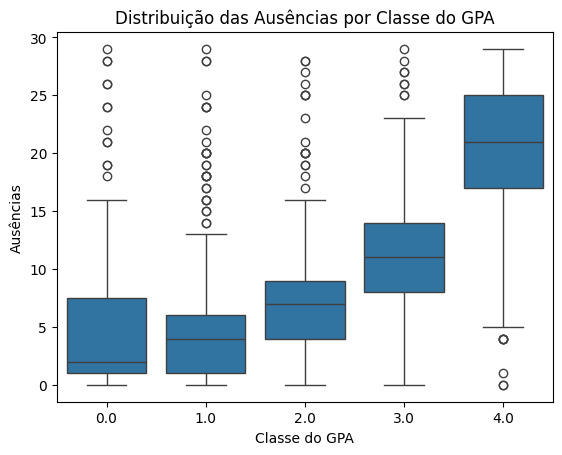

In [ ]:
#Verifica a distribuição das faltas pela classe do GPA, quanto mais próximo de 0, maior é o GPA.

sns.boxplot(data=performance_estudantes, x='GradeClass', y='Absences')
plt.title('Distribuição das Ausências por Classe do GPA')
plt.xlabel('Classe do GPA')
plt.ylabel('Ausências')
plt.show()


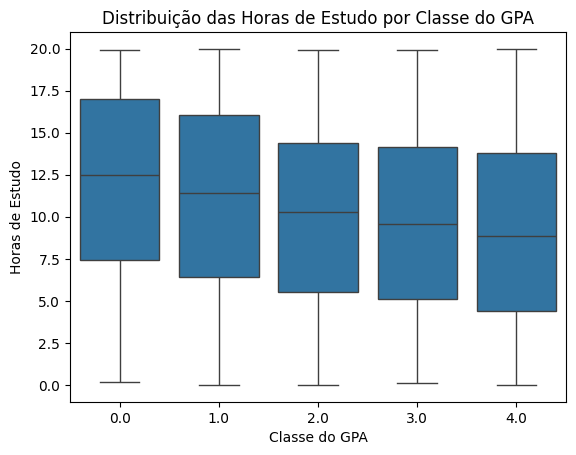

In [ ]:
sns.boxplot(data=performance_estudantes, x='GradeClass', y='StudyTimeWeekly')
plt.title('Distribuição das Horas de Estudo por Classe do GPA')
plt.xlabel('Classe do GPA')
plt.ylabel('Horas de Estudo')
plt.show()


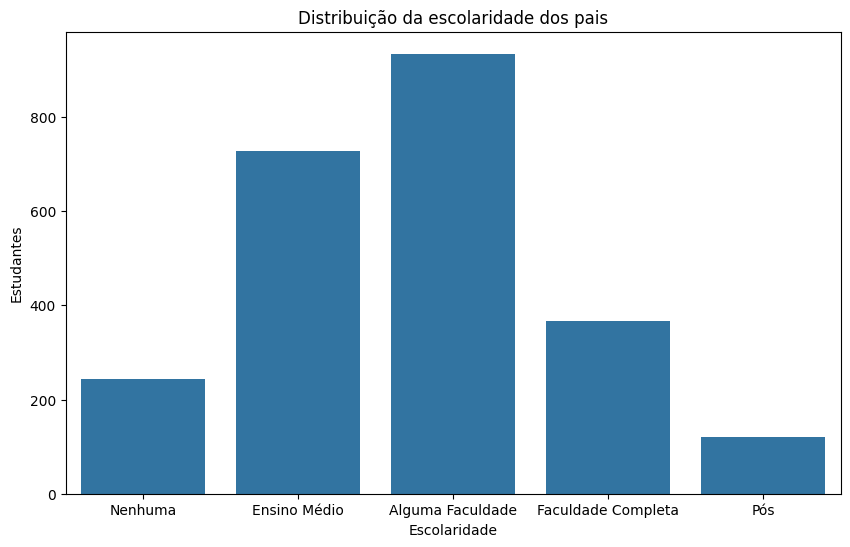

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ParentalEducation', data=performance_estudantes)
plt.title('Distribuição da escolaridade dos pais')
plt.xlabel('Escolaridade')
plt.ylabel('Estudantes')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Nenhuma', 'Ensino Médio', 'Alguma Faculdade', 'Faculdade Completa', 'Pós'])
plt.show()

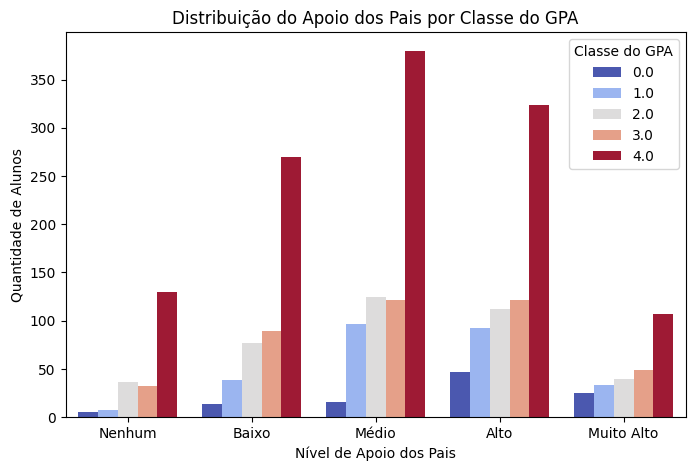

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=performance_estudantes, x='ParentalSupport', hue='GradeClass', palette='coolwarm')
plt.title('Distribuição do Apoio dos Pais por Classe do GPA')
plt.xlabel('Nível de Apoio dos Pais')
plt.ylabel('Quantidade de Alunos')
plt.legend(title="Classe do GPA")
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Nenhum', 'Baixo', 'Médio', 'Alto', 'Muito Alto'])
plt.show()

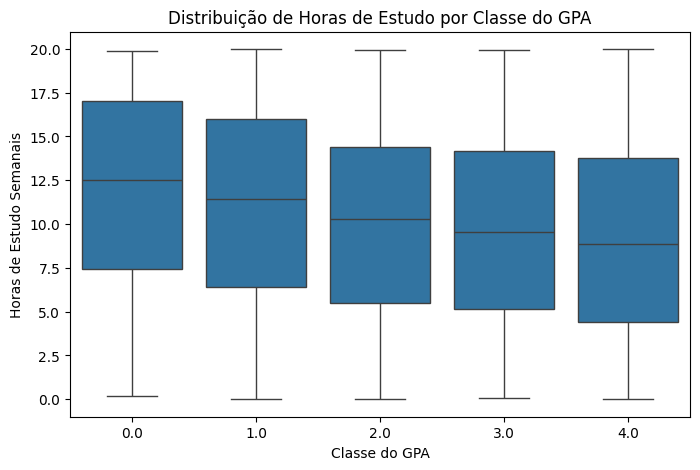

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="GradeClass", y="StudyTimeWeekly", data=performance_estudantes)
plt.xlabel("Classe do GPA")
plt.ylabel("Horas de Estudo Semanais")
plt.title("Distribuição de Horas de Estudo por Classe do GPA")
plt.show()


# **Árvore de Decisão**

In [ ]:
X = performance_estudantes[['GPA','StudyTimeWeekly','Absences','ParentalEducation','ParentalSupport']]
Y = performance_estudantes['GradeClass']

In [ ]:
X

,GPA,StudyTimeWeekly,Absences,ParentalEducation,ParentalSupport
0,2.929196,19.833723,7,2,2
1,3.042915,15.408756,0,1,1
2,0.112602,4.210570,26,3,2
3,2.054218,10.028829,14,3,3
4,1.288061,4.672495,17,2,3
...,...,...,...,...,...
2387,3.455509,10.680555,2,3,4
2388,3.279150,7.583217,4,1,4
2389,1.142333,6.805500,20,2,2
2390,1.803297,12.416653,17,0,2


In [ ]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, train_size=0.75)

In [ ]:
# Árvore de Decisão
model1 = DecisionTreeClassifier()
model1.fit(X_treino, Y_treino)

DecisionTreeClassifier()

# **Previsões e acurácia**

In [ ]:
#Acurácia do modelo

predictions1 = model1.predict(X_teste)
acuracia1 = accuracy_score(Y_teste, predictions1)
print(f"Acurácia do modelo: {acuracia1 * 100:.2f}%")

Acurácia do modelo: 86.29%


In [ ]:
#Previsão de futuros resultados

predictions1

array([4., 4., 0., 4., 4., 4., 4., 4., 1., 1., 3., 1., 4., 4., 4., 4., 2.,
       2., 1., 1., 4., 4., 2., 0., 2., 4., 0., 4., 2., 3., 4., 3., 3., 3.,
       4., 4., 3., 4., 4., 3., 4., 1., 4., 4., 4., 4., 2., 4., 2., 4., 4.,
       4., 4., 3., 4., 4., 4., 1., 4., 4., 0., 4., 4., 4., 4., 3., 4., 3.,
       2., 3., 1., 2., 4., 4., 4., 4., 4., 2., 4., 1., 1., 4., 3., 4., 3.,
       4., 4., 1., 4., 4., 4., 4., 2., 3., 4., 3., 4., 2., 1., 0., 2., 3.,
       4., 2., 1., 2., 4., 4., 4., 4., 3., 3., 2., 3., 3., 4., 3., 2., 4.,
       3., 4., 2., 2., 4., 4., 2., 4., 4., 1., 4., 4., 4., 2., 3., 0., 4.,
       0., 2., 4., 3., 1., 4., 4., 2., 4., 2., 4., 4., 4., 4., 4., 3., 2.,
       4., 2., 3., 4., 4., 4., 4., 4., 4., 2., 4., 4., 2., 3., 4., 1., 4.,
       4., 3., 2., 2., 1., 4., 4., 2., 4., 4., 4., 2., 3., 4., 4., 4., 4.,
       1., 4., 2., 4., 4., 3., 2., 4., 4., 4., 4., 4., 4., 4., 3., 1., 3.,
       2., 3., 3., 4., 0., 4., 4., 4., 2., 2., 3., 4., 1., 4., 3., 3., 2.,
       4., 4., 3., 3., 3.

In [ ]:
print(confusion_matrix(Y_teste, predictions1))

[[ 13   1   3   1   5]
 [  2  47   1   0  14]
 [  4   1  88   6  10]
 [  2   5   1  81   8]
 [  6   6   2   4 287]]


In [ ]:
print(classification_report(Y_teste, predictions1))

              precision    recall  f1-score   support

         0.0       0.48      0.57      0.52        23
         1.0       0.78      0.73      0.76        64
         2.0       0.93      0.81      0.86       109
         3.0       0.88      0.84      0.86        97
         4.0       0.89      0.94      0.91       305

    accuracy                           0.86       598
   macro avg       0.79      0.78      0.78       598
weighted avg       0.87      0.86      0.86       598



In [ ]:
regras = export_text(model1, feature_names=X.columns.tolist())
print(regras)


|--- GPA <= 2.00
|   |--- GPA <= 0.01
|   |   |--- ParentalSupport <= 1.50
|   |   |   |--- class: 4.0
|   |   |--- ParentalSupport >  1.50
|   |   |   |--- class: 1.0
|   |--- GPA >  0.01
|   |   |--- GPA <= 1.97
|   |   |   |--- GPA <= 1.36
|   |   |   |   |--- GPA <= 1.36
|   |   |   |   |   |--- Absences <= 15.50
|   |   |   |   |   |   |--- GPA <= 1.24
|   |   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |   |--- GPA >  1.24
|   |   |   |   |   |   |   |--- ParentalEducation <= 1.00
|   |   |   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |   |   |--- ParentalEducation >  1.00
|   |   |   |   |   |   |   |   |--- class: 3.0
|   |   |   |   |   |--- Absences >  15.50
|   |   |   |   |   |   |--- StudyTimeWeekly <= 5.84
|   |   |   |   |   |   |   |--- GPA <= 1.33
|   |   |   |   |   |   |   |   |--- GPA <= 0.95
|   |   |   |   |   |   |   |   |   |--- StudyTimeWeekly <= 0.96
|   |   |   |   |   |   |   |   |   |   |--- StudyTimeWeekly <= 0.89
|   |   |   |   |